In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [86]:
fact_df = pd.read_csv('fact_table.csv')
customer_df = pd.read_csv('customer_dim.csv', encoding='ISO-8859-1')
item_df = pd.read_csv('item_dim.csv', encoding='ISO-8859-1')
store_df = pd.read_csv('store_dim.csv')
time_df = pd.read_csv('time_dim.csv')
trans_df = pd.read_csv('Trans_dim.csv')


In [87]:
fact_df.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


In [49]:
customer_df = pd.read_csv('customer_dim.csv', encoding='ISO-8859-1')
customer_df.head()

,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323


In [50]:
item_df = pd.read_csv('item_dim.csv', encoding='ISO-8859-1')
item_df.head()

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans


In [51]:
store_df = pd.read_csv('store_dim.csv')
store_df.head()

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR


In [88]:
time_df = pd.read_csv('time_dim.csv')
time_df.head()

,time_key,date,hour,day,week,month,quarter,year
0,T00001,20-05-2017 14:56,14,20,3rd Week,5,Q2,2017
1,T00002,30-01-2015 22:14,22,30,4th Week,1,Q1,2015
2,T00003,14-03-2020 02:34,2,14,2nd Week,3,Q1,2020
3,T00004,27-04-2018 12:19,12,27,4th Week,4,Q2,2018
4,T00005,14-04-2018 10:43,10,14,2nd Week,4,Q2,2018


In [53]:
trans_df = pd.read_csv('Trans_dim.csv')
trans_df.head()

,payment_key,trans_type,bank_name
0,P001,cash,NaN
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited


In [89]:
df = fact_df \
    .merge(customer_df, on="coustomer_key", how="left") \
    .merge(item_df, on="item_key", how="left") \
    .merge(store_df, on="store_key", how="left") \
    .merge(time_df, on="time_key", how="left") \
    .merge(trans_df, on="payment_key", how="left")
df.sample(10)

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit_x,unit_price_x,total_price,name,...,upazila,date,hour,day,week,month,quarter,year,trans_type,bank_name
682453,P017,C008970,T04537,I00016,S00366,1,cans,16.25,16.25,nishu kumari,...,ATPARA,25-03-2018 03:25,3,25,4th Week,3,Q1,2018,card,Modhumoti Bank Limited
984431,P011,C002914,T022202,I00195,S00577,3,ct,12.50,37.50,surbhi,...,KHULNA SADAR,28-05-2018 05:10,5,28,4th Week,5,Q2,2018,card,Eastern Bank Limited
879616,P035,C000386,T083003,I00093,S00570,6,bottles,13.00,78.00,pappu @ mahender singh,...,BATIAGHATA,22-05-2015 12:17,12,22,4th Week,5,Q2,2015,card,Uttara Bank Limited
349471,P027,C000684,T084654,I00120,S0037,11,ct,9.00,99.00,reena,...,SYLHET SADAR,20-07-2019 12:55,12,20,3rd Week,7,Q3,2019,card,Prime Bank Limited
724113,P034,C008973,T047347,I00016,S00109,7,cans,16.25,113.75,jaivanti,...,AKKELPUR,05-01-2017 08:58,8,5,1st Week,1,Q1,2017,card,United Commercial Bank Ltd
286695,P002,C005396,T070616,I00059,S00198,5,bottles,22.00,110.00,fatma,...,DUMURIA,08-04-2019 15:41,15,8,2nd Week,4,Q2,2019,card,AB Bank Limited
150098,P012,C006636,T07954,I00018,S0044,8,cans,6.75,54.00,deepa,...,FULBARI,19-12-2020 20:47,20,19,3rd Week,12,Q4,2020,card,IFIC Bank Limited
26428,P030,C007960,T075293,I00069,S0048,7,bottles,17.50,122.50,rekha,...,KHANSAMA,02-09-2015 21:37,21,2,1st Week,9,Q3,2015,card,Shimanto Bank Ltd
212763,P014,C007232,T071917,I00206,S00459,7,ct,15.00,105.00,nazma,...,DAUDKANDI,25-01-2015 02:58,2,25,4th Week,1,Q1,2015,card,Meghna Bank Limited
68214,P030,C000699,T042517,I00013,S00265,8,cans,6.75,54.00,nitu kumari,...,NEW MARKET,25-06-2016 01:58,1,25,4th Week,6,Q2,2016,card,Shimanto Bank Ltd


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   payment_key       1000000 non-null  object 
 1   time_key          1000000 non-null  object 
 2   item_key          1000000 non-null  object 
 3   store_key         1000000 non-null  object 
 4   quantity          1000000 non-null  int64  
 5   total_price       1000000 non-null  float64
 6   item_name         1000000 non-null  object 
 7   man_country       1000000 non-null  object 
 8   supplier          1000000 non-null  object 
 9   division          1000000 non-null  object 
 10  district          1000000 non-null  object 
 11  date              1000000 non-null  object 
 12  hour              1000000 non-null  int64  
 13  day               1000000 non-null  int64  
 14  week              1000000 non-null  object 
 15  month             1000000 non-null  int64  
 16  q

In [70]:
df.describe(include='object')

,payment_key,coustomer_key,time_key,item_key,store_key,unit_x,name,item_name,desc,man_country,supplier,unit_y,division,district,upazila,date,week,quarter,trans_type,bank_name
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,39,9191,99993,264,726,19,4535,259,30,10,10,19,7,64,540,98572,4,4,3,39
top,P002,C006906,T087994,I00015,S0039,ct,pooja,Pepsi - 12 oz cans,a. Beverage - Soda,Bangladesh,DENIMACH LTD,ct,DHAKA,DHAKA,KOTWALI,02-05-2015 20:02,4th Week,Q3,card,AB Bank Limited
freq,26046,156,26,3952,1497,355938,20173,7724,109741,128655,128655,355938,386888,224034,6909,36,313070,253476,897319,26046


In [90]:
#missing values in unit_x , name , unit_y ,bank_name
df.isnull().sum()

payment_key          0
coustomer_key        0
time_key             0
item_key             0
store_key            0
quantity             0
unit_x            3723
unit_price_x         0
total_price          0
name              2990
contact_no           0
nid                  0
item_name            0
desc                 0
unit_price_y         0
man_country          0
supplier             0
unit_y            3723
division             0
district             0
upazila              0
date                 0
hour                 0
day                  0
week                 0
month                0
quarter              0
year                 0
trans_type           0
bank_name        25590
dtype: int64

In [91]:
df['unit'] = df['unit_x'].fillna(df['unit_y'])
df['unit_price'] = df['unit_price_x'].fillna(df['unit_price_y'])
df['customer_key'] = df['coustomer_key']
df['sub-district'] = df['upazila']
df['item_description'] = df['desc']

In [92]:
df = df.drop(columns = ['unit_x', 'unit_y', 'unit_price_y', 'unit_price_x', 
                         'coustomer_key', 'upazila', 'desc', 'name', 'nid', 
                         'contact_no'])

In [93]:
list(df.columns)

['payment_key',
 'time_key',
 'item_key',
 'store_key',
 'quantity',
 'total_price',
 'item_name',
 'man_country',
 'supplier',
 'division',
 'district',
 'date',
 'hour',
 'day',
 'week',
 'month',
 'quarter',
 'year',
 'trans_type',
 'bank_name',
 'unit',
 'unit_price',
 'customer_key',
 'sub-district',
 'item_description']

In [94]:
df.sample(10)

,payment_key,time_key,item_key,store_key,quantity,total_price,item_name,man_country,supplier,division,...,month,quarter,year,trans_type,bank_name,unit,unit_price,customer_key,sub-district,item_description
525949,P022,T073258,I00149,S00530,1,15.0,Plastic Spoons White Heavyweight,Finland,HARDFORD AB,BARISAL,...,9,Q3,2020,card,NRB Commercial Bank Ltd,ct,15.00,C007609,WAZIRPUR,Dishware - Utensils
695479,P020,T052142,I00220,S00678,4,56.0,Austin Cookie Cracker Variety,Germany,Friedola 1888 GmbH,DHAKA,...,12,Q4,2020,card,National Credit & Commerce Bank Limited,ct,14.00,C005549,TEJGAON,Food - Snacks
990482,P016,T035021,I00165,S00699,9,144.0,Miss Vickies Chips,Finland,HARDFORD AB,CHITTAGONG,...,12,Q4,2015,card,Midland Bank Limited,bags,16.00,C006321,CHITTAGONG PORT,Food - Chips
687688,P012,T038987,I00168,S00395,9,162.0,Snyders Pretzels Minis,Germany,Friedola 1888 GmbH,DHAKA,...,7,Q3,2018,card,IFIC Bank Limited,ct,18.00,C005869,DHANBARI,Food - Chips
353859,P008,T049634,I00249,S0094,9,144.0,Clorox Bleach Large Jugs,China,"CHERRY GROUP CO.,LTD",RANGPUR,...,5,Q2,2019,card,Community Bank Bangladesh Limited,pack,16.00,C003079,PIRGANJ,Kitchen Supplies
273518,P024,T065220,I00217,S00219,5,102.5,Unsalted Premium Blend Nuts,Germany,Friedola 1888 GmbH,KHULNA,...,1,Q1,2020,card,One Bank Limited,oz,20.50,C001635,GANGNI,Food - Nuts
968123,P033,T040053,I00059,S00441,11,242.0,Muscle Milk Protein Shake Van. 11oz,Lithuania,BIGSO AB,CHITTAGONG,...,9,Q3,2018,card,Trust Bank Limited,bottles,22.00,C001590,KHULSHI,Beverage - Energy/Protein
530542,P021,T042686,I00130,S00594,5,70.0,Hefty Supreme Foam Bowls 12oz,Finland,HARDFORD AB,DHAKA,...,11,Q4,2017,card,NRB Bank Limited,ct,14.00,C003988,CANTONMENT,Dishware - Bowls
551769,P015,T072160,I00136,S00179,3,58.5,Dixie Perfecttouch Paper Cups 12oz,Lithuania,BIGSO AB,KHULNA,...,5,Q2,2014,card,Mercantile Bank Limited,ct,19.50,C007959,DAMURHUDA,Dishware - Cups Hot
771025,P027,T097071,I00077,S0013,2,13.5,Fuze Iced Tea,poland,CHROMADURLIN S.A.S,SYLHET,...,7,Q3,2019,card,Prime Bank Limited,cans,6.75,C005025,MAULVIBAZAR SADAR,Beverage - Iced Tea


In [95]:
df.isnull().sum()

payment_key             0
time_key                0
item_key                0
store_key               0
quantity                0
total_price             0
item_name               0
man_country             0
supplier                0
division                0
district                0
date                    0
hour                    0
day                     0
week                    0
month                   0
quarter                 0
year                    0
trans_type              0
bank_name           25590
unit                 3723
unit_price              0
customer_key            0
sub-district            0
item_description        0
dtype: int64

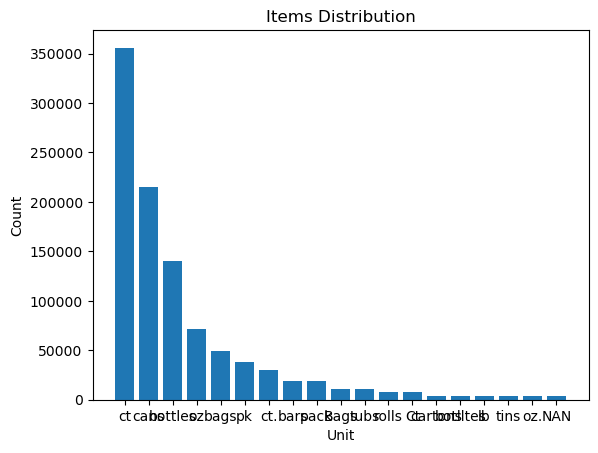

In [82]:
dm = df['unit'].value_counts()

plt.bar(dm.index, dm.values)
plt.xlabel("Unit")
plt.ylabel("Count")
plt.title("Items Distribution")
plt.show()
